<a href="https://colab.research.google.com/github/Benylaode/Machine-Learning-Learn/blob/main/Belajar_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
data = pd.read_excel('DATA RUMAH.xlsx')


In [4]:
data

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [5]:
X = data[['LB', 'LT', 'KT', 'KM', 'GRS']]
y = data['HARGA']

# Pembagian data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Menggunakan Model RandomForest Refresi (supervised learning)

Mean Squared Error: 1.0635204265435824e+19
R^2 Score: 0.772181577855092


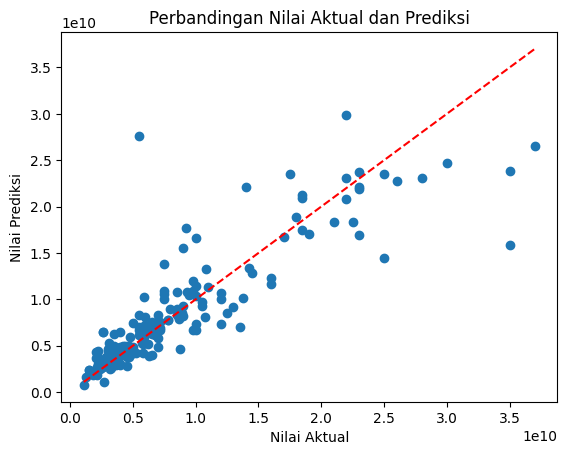

In [6]:
model = Pipeline(steps=[

    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualisasi hasil prediksi
plt.scatter(y_test, y_pred)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Aktual dan Prediksi')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Garis identitas
plt.show()

In [11]:
def predict_house_price(features):
    # Ubah input menjadi array NumPy
    input_data = np.array(features).reshape(1, -1)  # Mengubah input menjadi format yang sesuai
    prediction = model.predict(input_data)  # Gunakan model untuk memprediksi
    return prediction[0]
feature_1 = float(input("Masukkan nilai fitur jumlah luas tanah LB: "))
feature_2 = float(input("Masukkan nilai fitur jumlah luas bangunan LT: "))
feature_3 = float(input("Masukkan nilai fitur umlah kamar tidur KT: "))
feature_4 = float(input("Masukkan nilai fitur umlah kamar mandi KM: "))
feature_5 = float(input("Masukkan nilai fitur ada/tidak ada GRS: "))

features = [feature_1, feature_2, feature_3, feature_4, feature_5]
predicted_price = predict_house_price(features)

# Tampilkan hasil prediksi
print(f'Harga rumah yang diprediksi: {predicted_price}')

Masukkan nilai fitur jumlah luas tanah LB: 200
Masukkan nilai fitur jumlah luas bangunan LT: 100
Masukkan nilai fitur umlah kamar tidur KT: 32
Masukkan nilai fitur umlah kamar mandi KM: 3
Masukkan nilai fitur ada/tidak ada GRS: 4
Harga rumah yang diprediksi: 3109500000.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Melakukan Clustering Unsupervised learning

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standarisasi fitur
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Menggunakan 3 kluster
])

pipeline.fit(X_train)
clusters = pipeline.predict(X_test)

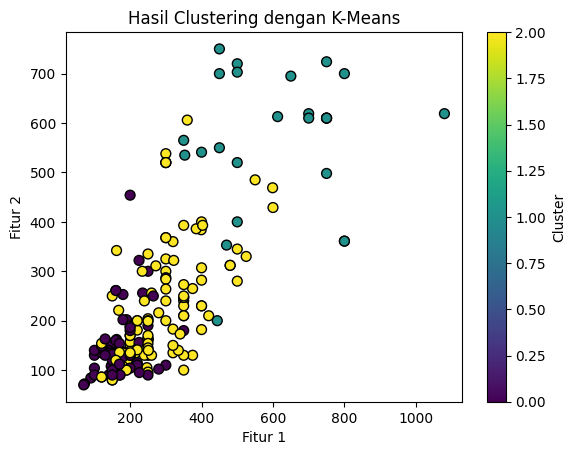

Jumlah data per kluster: {0: 77, 1: 25, 2: 100}


In [13]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("Hasil Clustering dengan K-Means")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.colorbar(label='Cluster')
plt.show()

# Hitung jumlah data dalam setiap kluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Jumlah data per kluster:", cluster_counts)